In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#

sample = pd.read_csv('E://git仓库/my-master/InsuranceProject/2/sample_submission.csv')
train = pd.read_csv('E://git仓库/my-master/InsuranceProject/2/train.csv')
test = pd.read_csv('E://git仓库/my-master/InsuranceProject/2/test.csv')

In [ ]:
train.head(10)

In [ ]:
train.tail(10)

In [ ]:
train.info()

In [ ]:
train.info()

In [ ]:
train.describe()

In [ ]:
train.isnull().sum()

In [ ]:
missing_percentage = (train.isnull().sum() / len(train)) * 100
print(missing_percentage)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for all numerical columns
def plot_outliers(train):
    numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
    for column in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=train[column], color="skyblue")
        plt.title(f"Boxplot of {column} (Outliers Visualization)")
        plt.xlabel(column)
        plt.show()

# Call the function to plot
plot_outliers(train)

In [ ]:
def remove_outliers_iqr(train):
    cleaned_data = train.copy()
    outlier_data = {}
    
    for column in train.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = train[column].quantile(0.25)
        Q3 = train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)]
        outlier_data[column] = outliers
        
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    
    return cleaned_data, outlier_data

cleaned_data, outlier_data = remove_outliers_iqr(train)

def plot_outliers_with_removed(train, outlier_data):
    for column in train.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(8, 4))
        
        # Plot original boxplot without highlighting outliers
        sns.boxplot(x=train[column], color="skyblue", flierprops={'marker': 'o', 'color': 'blue'})
        
        # Highlight the removed outliers in purple
        if column in outlier_data:
            outliers = outlier_data[column]
            plt.scatter(outliers[column], [1] * len(outliers), color="purple", label="Outliers Removed", s=100, edgecolor='black')
        
        plt.title(f"Boxplot of {column} with Outliers in Purple")
        plt.xlabel(column)
        plt.legend()
        plt.show()

plot_outliers_with_removed(train, outlier_data)

In [ ]:
train.describe(include = 'O')

In [ ]:
## knowing all the unique value in the columns

train_unique = train.drop(columns = 'id')

for column in train_unique.columns:
    print(f"{column}: ")
    print("")
    print(train_unique[column].unique())
    print("")

In [ ]:
train.drop(columns = 'id', inplace = True)
train.head()

In [ ]:
plt.figure(figsize = (20, 10))
x = 1

for column in train.describe().columns:
    plt.subplot(4,2, x)
    sns.boxplot(train[column], color='purple')
    x += 1

plt.tight_layout()
plt.show()

In [ ]:
train['Gender'] = train['Gender'].map({'Female':1, 'Male':0})
train.head()

In [ ]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'Yes':1, 'No':0})
train.head()

In [ ]:
train['Vehicle_Age'] = train['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years': 2})
train.head()

In [ ]:
train.info()

In [ ]:
train['Gender'].value_counts()

In [ ]:
pd.crosstab(index = train['Gender'], columns = train['Response'], normalize = 'index')

In [ ]:
pd.crosstab(index = train['Age'], columns = train['Response'], normalize = 'index')

In [ ]:
pd.crosstab(index = train['Age'], columns = train['Response'], normalize = 'columns').sort_values(1, ascending = False)

In [ ]:
plt.figure(figsize=(18, 8))
custom_palette = ['#2c3e50', '#e74c3c']

sns.countplot(x='Age', hue='Response', data=train, palette=custom_palette)
plt.title('Count of Responses by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Response', fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(18, 8))
custom_palette = ['#2c3e50', '#e74c3c']

sns.countplot(x='Gender', hue='Response', data=train, palette=custom_palette)
plt.title('Count of Responses by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Response', fontsize=12)
plt.show()


In [ ]:
train['Driving_License'].value_counts(normalize= True)

In [ ]:
pd.crosstab(index = train['Driving_License'], columns = train['Response'], normalize = 'index')

In [ ]:
pd.crosstab(index = train['Previously_Insured'], columns = train['Response'], normalize = 'index')

In [ ]:
pd.crosstab(index = train['Vehicle_Age'], columns = train['Response'], normalize = 'columns')

In [ ]:
pd.crosstab(index = train['Response'], columns = 'Test', values = train['Annual_Premium'], aggfunc = 'median')

In [ ]:
plt.figure(figsize=(14, 8))
custom_palette = ['#6a0dad', '#9370db', '#dda0dd']

sns.barplot(x='Vehicle_Age', y='Response', hue='Vehicle_Damage', data=train, palette=custom_palette)
plt.title('Response by Vehicle Age and Damage', fontsize=16)
plt.xlabel('Vehicle Age', fontsize=14)
plt.ylabel('Response', fontsize=14)
plt.legend(title='Vehicle Damage', fontsize=12)
plt.show()

In [ ]:
sns.barplot(x = train['Previously_Insured'], y = train['Response'])

In [ ]:
plt.figure(figsize=(14, 8))
blackberry_color = '#4B0082'

sns.barplot(x='Response', y='Annual_Premium', data=train, color=blackberry_color)
plt.title('Annual Premium by Response', fontsize=16)
plt.xlabel('Response', fontsize=14)
plt.ylabel('Annual Premium', fontsize=14)
plt.show()
#          =========

In [ ]:
train['Response'].value_counts(normalize = True)

In [ ]:
plt.figure(figsize = (20, 12))
sns.heatmap(train.corr(), annot = True)

In [ ]:
correlation = train.corr()
correlation['Response'].sort_values(ascending = False)[1:]

In [ ]:
X = train.drop(columns = [ 'Driving_License','Response', 'Region_Code', 'Policy_Sales_Channel', 'Gender', 'Vintage'])
y = train['Response']

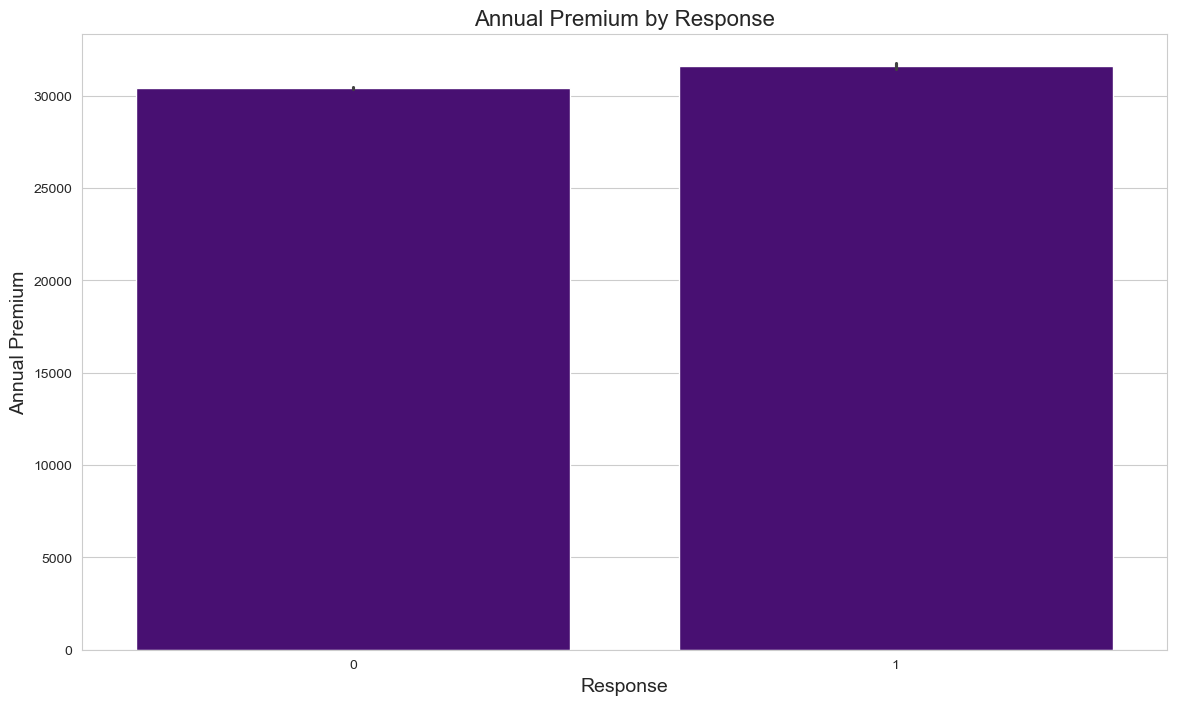

In [34]:
plt.figure(figsize=(14, 8))
blackberry_color = '#4B0082'

sns.barplot(x='Response', y='Annual_Premium', data=train, color=blackberry_color)
plt.title('Annual Premium by Response', fontsize=16)
plt.xlabel('Response', fontsize=14)
plt.ylabel('Annual Premium', fontsize=14)
plt.show()


In [35]:
train['Response'].value_counts(normalize = True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

<Axes: >

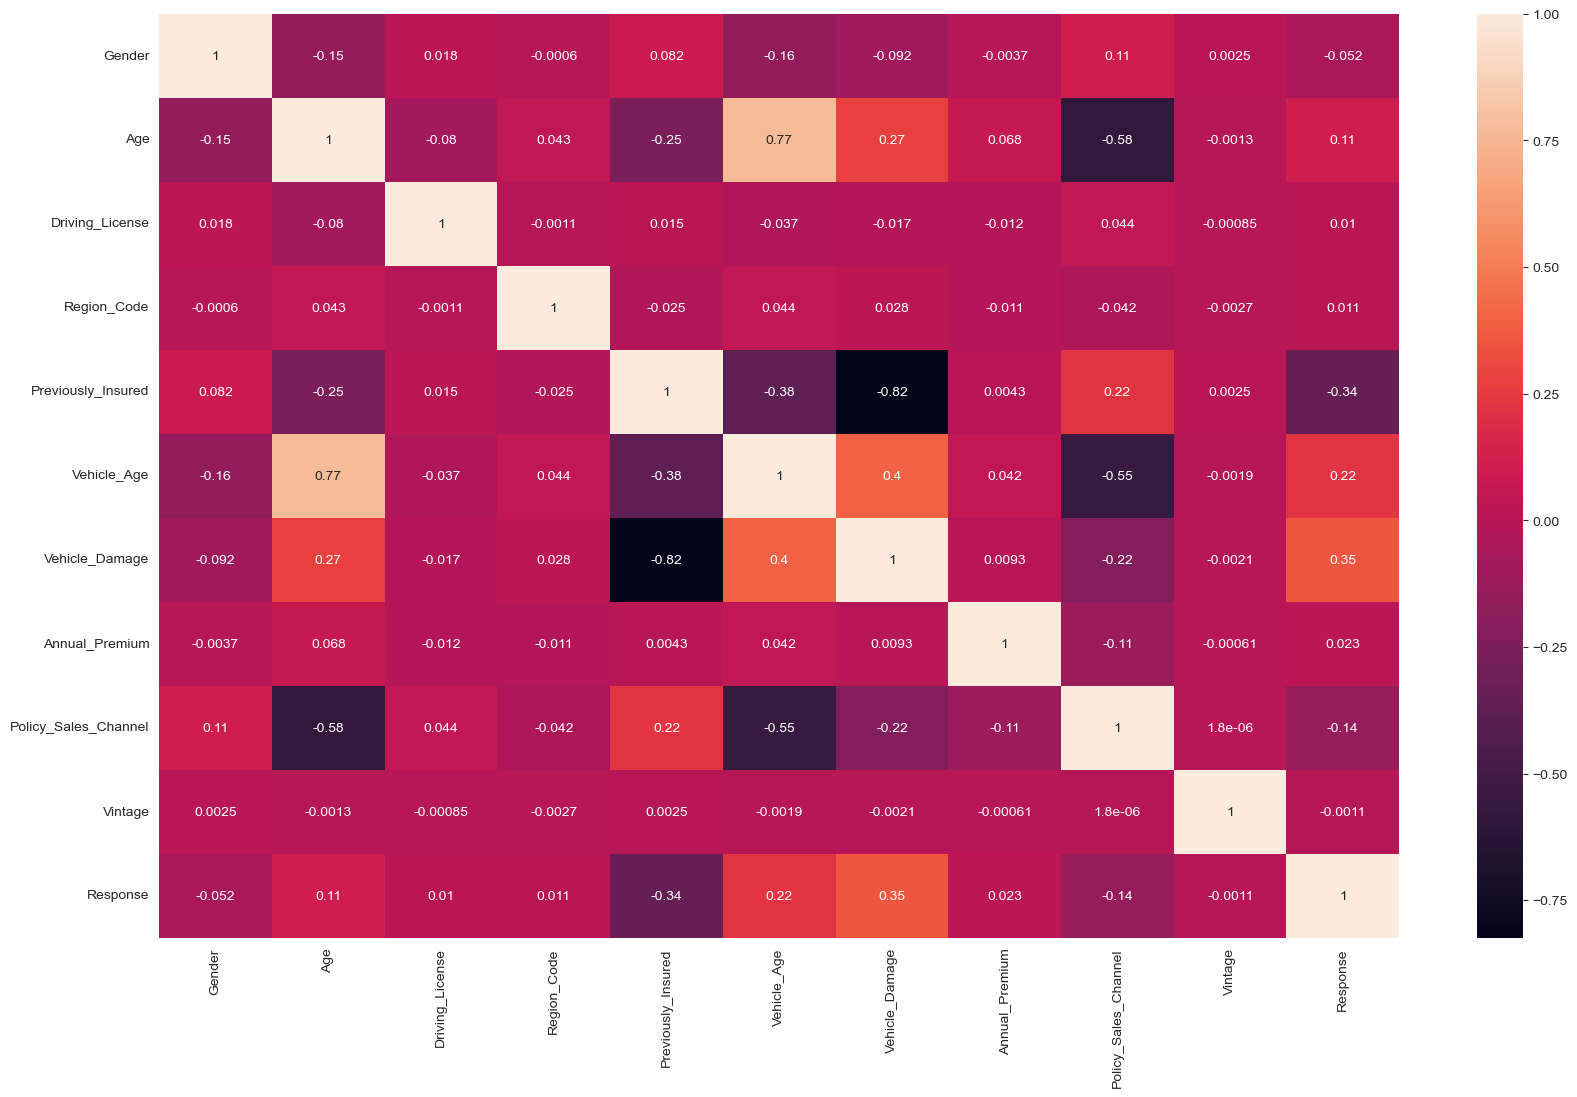

In [36]:
plt.figure(figsize = (20, 12))
sns.heatmap(train.corr(), annot = True)

In [37]:
correlation = train.corr()
correlation['Response'].sort_values(ascending = False)[1:]

Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
Gender                 -0.052440
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

In [38]:
X = train.drop(columns = [ 'Driving_License','Response', 'Region_Code', 'Policy_Sales_Channel', 'Gender', 'Vintage'])
y = train['Response']